<a href="https://colab.research.google.com/github/PerceptronV/icarus/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install tensorflow
!pip install soundfile==0.12.1
!gsutil -m cp -r gs://gresearch/sound_separation/bird_mixit_model_checkpoints .

In [4]:
!git clone https://github.com/google-research/sound-separation/

Cloning into 'sound-separation'...
remote: Enumerating objects: 889, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 889 (delta 19), reused 32 (delta 13), pack-reused 839 (from 1)
Receiving objects: 100% (889/889), 62.19 MiB | 16.69 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Updating files: 100% (709/709), done.


In [5]:
# Import necessary libraries.
import os
import glob
import imageio
import random, shutil
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import librosa.display

In [6]:
import os
print(os.getcwd())  # Print the current working directory

/content


In [7]:
!ls /content

bird_mixit_model_checkpoints  sample_data  sound-separation


In [76]:
import librosa
import soundfile as sf

# Load the MP3 file
y, sr = librosa.load('/content/XC936318.mp3')

# Save as WAV
sf.write('Eurasion_Coot.wav', y, sr)

In [77]:
!python3 sound-separation/models/tools/process_wav.py \
--model_dir /content/bird_mixit_model_checkpoints/output_sources4 \
--checkpoint /content/bird_mixit_model_checkpoints/output_sources4/model.ckpt-3223090 \
--num_sources 4 \
--input Eurasion_Coot.wav \
--output EC.wav

2024-11-02 22:25:22.997901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 22:25:23.028734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 22:25:23.037789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 22:25:23.060519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 22:25:24.443138: W tensorflow/compiler/tf2

_____________________________________

**PART2**
AUDIO FILES TO SPECTROGRAM

y: [ 0.00077673 -0.00018912  0.00053965 ...  0.00156342 -0.00198199
 -0.00226736] 

y shape: (601724,) 

Sample rate (KHz): 22050 

Length of audio: 27.28907029478458


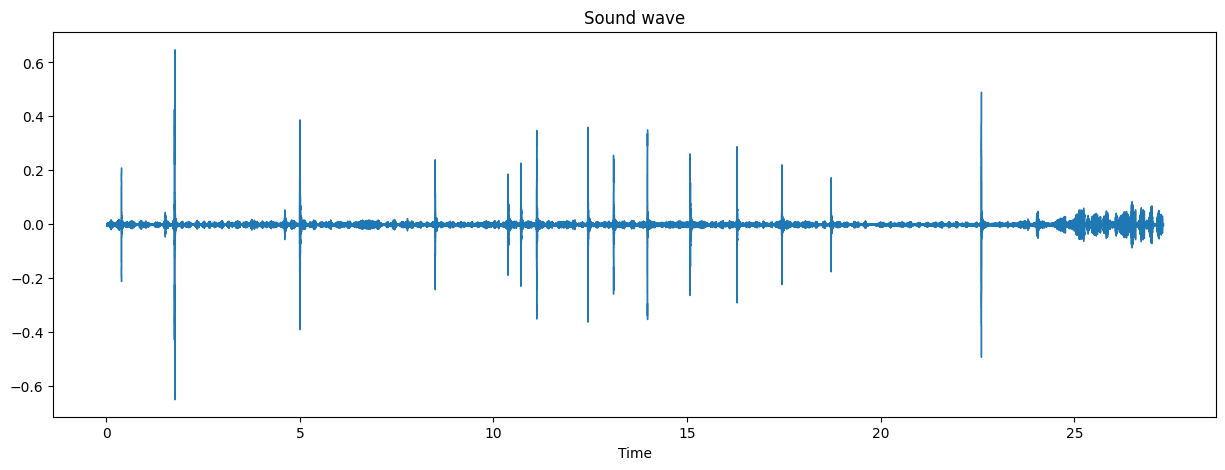

In [78]:
def view_soundwave(path):

  y, sample_rate = librosa.load(path)

  print('y:', y, '\n')
  print('y shape:', np.shape(y), '\n')
  print('Sample rate (KHz):', sample_rate, '\n')
  print(f'Length of audio: {np.shape(y)[0]/sample_rate}')

  plt.figure(figsize=(15, 5))
  librosa.display.waveshow(y=y, sr=sample_rate);
  plt.title("Sound wave")
  plt.show()

view_soundwave('/content/XC936318.mp3')

In [79]:
# Convert sound wave to mel spectrogram.

def spect(path):
  y, sr = librosa.load(path)

  S = librosa.feature.melspectrogram(y=y, sr=sr)
  S_DB = librosa.amplitude_to_db(S, ref=np.max)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(S_DB, sr=sr, hop_length=512,
                          x_axis='time', y_axis='log')
  plt.colorbar()
  plt.title(f"Mel spectrogram: {path}", fontsize=20)
  plt.show()

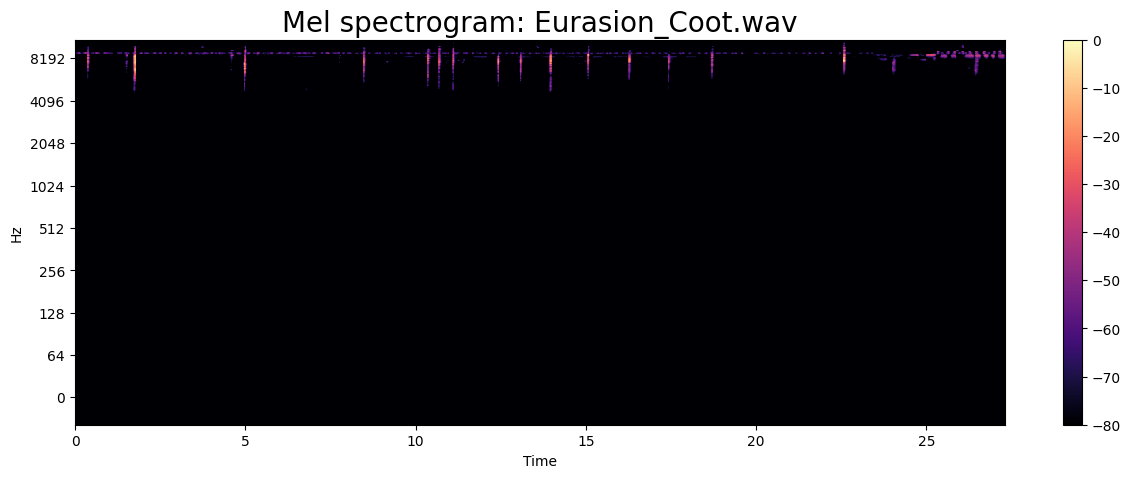

In [80]:
spect('Eurasion_Coot.wav')

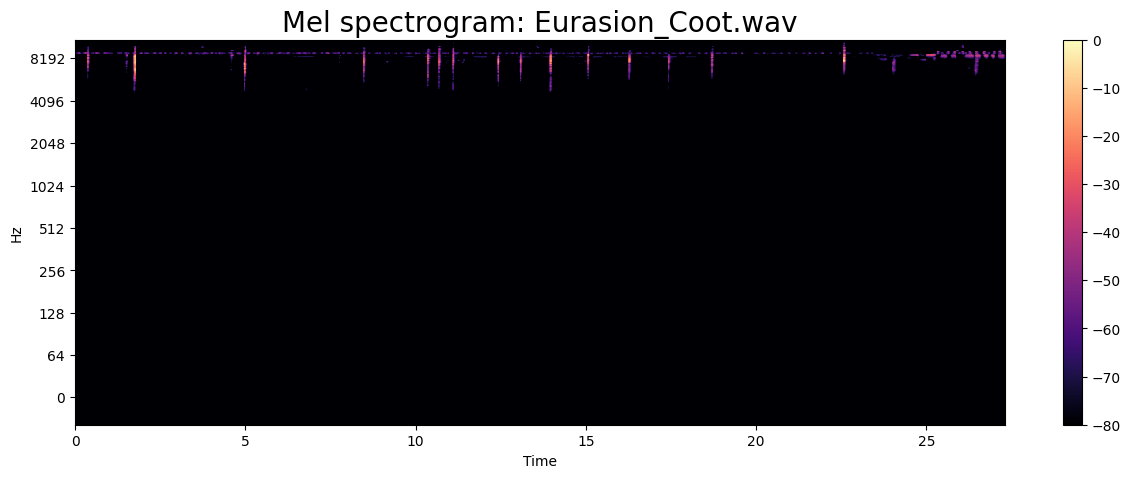

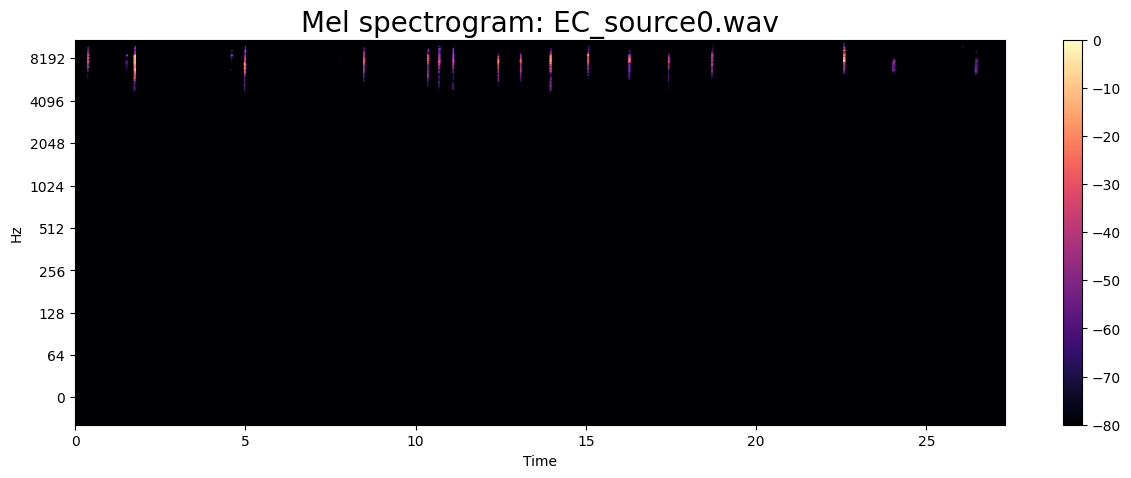

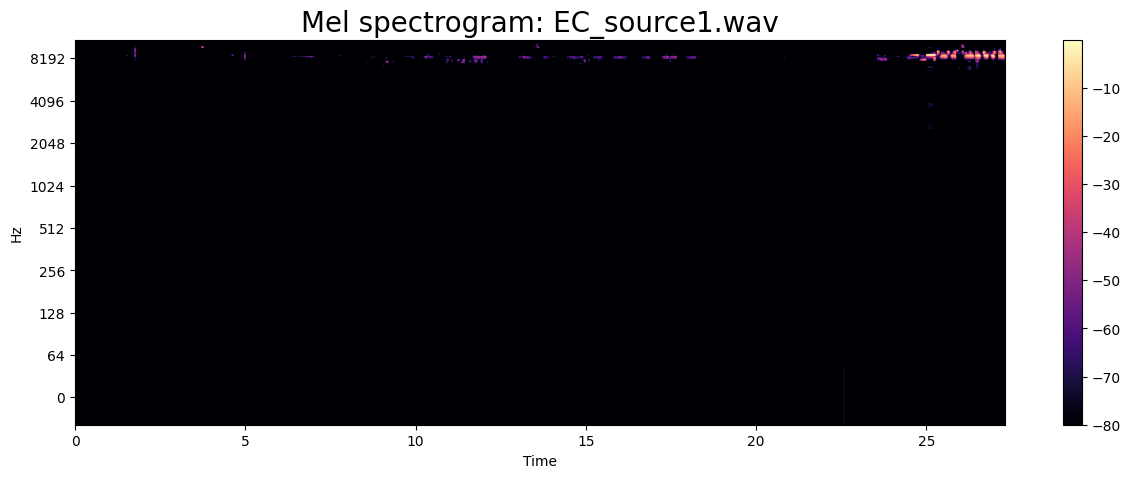

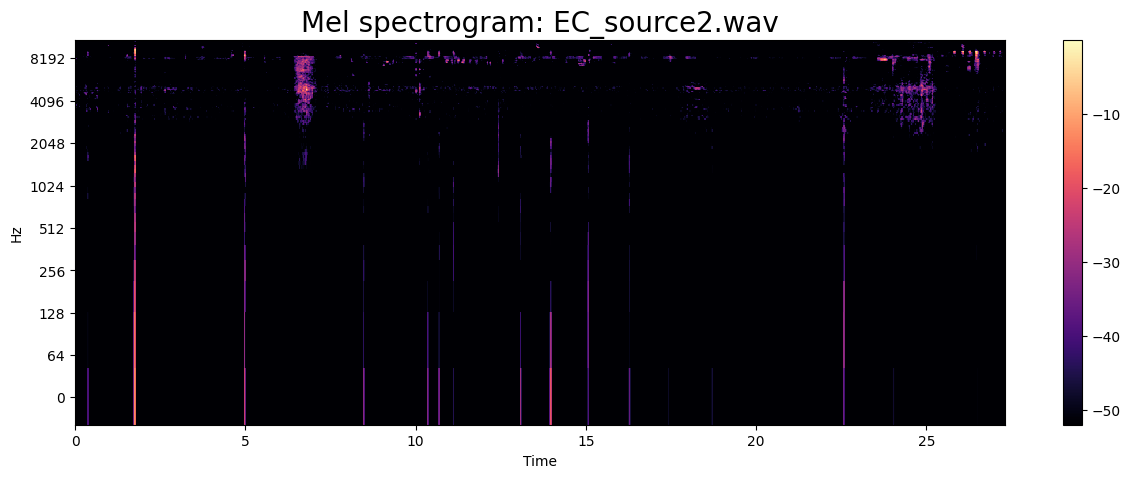

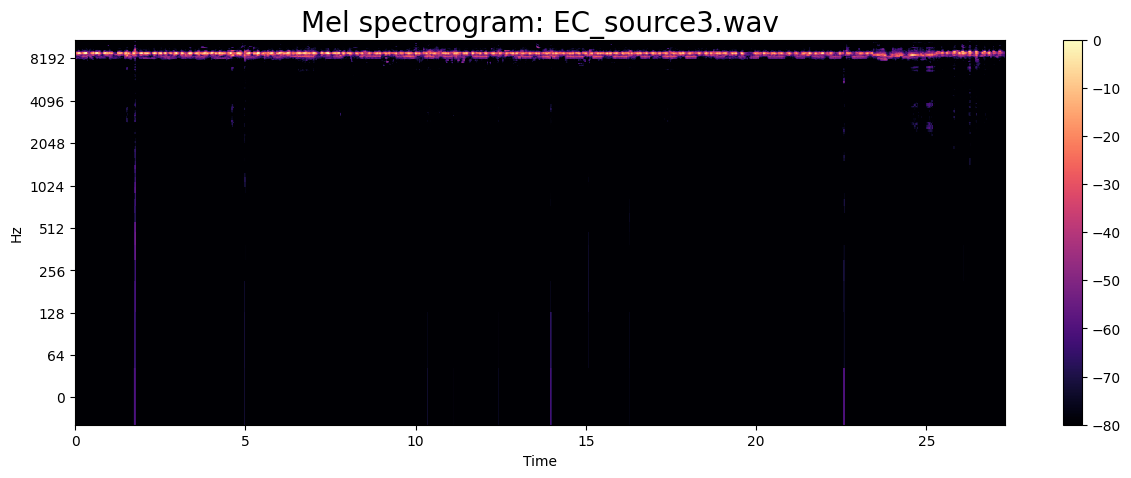

In [82]:
spect('Eurasion_Coot.wav')
spect('EC_source0.wav')
spect('EC_source1.wav')
spect('EC_source2.wav')
spect('EC_source3.wav')

In [69]:
def extract_metrics(path):
    # Load audio file
    y, sr = librosa.load(path)

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)

    return S_DB.mean(), S_DB.std(), S_DB.min(), S_DB.max()

def compare_files(fpaths, thres=10):
    # Extract metrics for each file
    metrics = np.array([extract_metrics(fpath) for fpath in fpaths])

    # Select file with highest
    dirty_signals = np.where(metrics[:, 1] >= thres)[0]
    means = metrics[:,0].copy()
    means[dirty_signals] = -np.inf
    loudest_signal = np.argmax(means)

    return fpaths[loudest_signal]

In [58]:
spect_analysis('Eurasion_Coot.wav')
spect_analysis('EC_source0.wav')
spect_analysis('EC_source1.wav')
spect_analysis('EC_source2.wav')
spect_analysis('EC_source3.wav')

-70.67013 11.135505 -80.0 0.0
-79.55227 4.38316 -80.0 0.0
-79.7339 3.4793782 -80.0 0.0
-45.913002 20.777569 -80.0 0.0
-79.06386 5.3254 -80.0 0.0


In [83]:
compare_files(['EC_source0.wav', 'EC_source1.wav', 'EC_source2.wav', 'EC_source3.wav'])

2


'EC_source2.wav'

In [75]:
# This block will run the comparison in a single "click"
# Load the MP3 file
y, sr = librosa.load('/content/XC936318.mp3')

# Save as WAV
sf.write('Eurasion_Coot.wav', y, sr)
os.system('''
python3 sound-separation/models/tools/process_wav.py \
--model_dir /content/bird_mixit_model_checkpoints/output_sources4 \
--checkpoint /content/bird_mixit_model_checkpoints/output_sources4/model.ckpt-3223090 \
--num_sources 4 \
--input Eurasion_Coot.wav \
--output EC.wav
''')
compare_files(['EC_source0.wav', 'EC_source1.wav', 'EC_source2.wav', 'EC_source3.wav'])

2


'EC_source2.wav'